In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# usada para pre proceso de los datos
from sklearn import preprocessing

In [3]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

In [4]:
# Usado para selección de features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
# Para dividir el data en conjunto de entranamiento y testeo
from sklearn.model_selection import train_test_split

In [6]:
# PCA para reducir dimensionalidad
from sklearn.decomposition import PCA

In [7]:
# Regresión logística
from sklearn.linear_model import LogisticRegression

In [8]:
# Medidas de performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [9]:
# Graficos
from matplotlib import pyplot

In [10]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud

In [11]:
# SMOTE para balancear los datos
from imblearn.over_sampling import SMOTE
from collections import Counter

# Descripción, split de datos y detección de desbalanceo

In [12]:
# Se abre el archivo
data = pd.read_csv('creditcard.csv')

In [13]:
# Se muestra el archivos
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
# Se revisa el tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
# Se revisa cuántas filas y columnas tiene el dataset
data.shape

(284807, 31)

In [16]:
# Se muestra una descripción estadística de los datos
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
# Se revisan las columnas del dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
# Se revisa si es que hay datos nulos
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
# Se indican las variables independientes y la dependiente
X_data = data.iloc[:,0:30]
y_data = data.iloc[:,-1]

In [20]:
# Se escala la data para que los datos esten dentro de un mismo rango
# Esto se realiza debido a que los datos no presentan una uniformidad en cuanto a su rango
# y además porque estaré aplicando PCA ya que son muchas columnas y pueden meter mucho ruido al modelo
standard_scaler = preprocessing.StandardScaler()
X_standard_scaled_df = standard_scaler.fit_transform(X_data)

In [21]:
# Se imprime el df escalado obtenido.
X_standard_scaled_df


array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [22]:
# Orden y creando el df escalado
X_standard_scaled_df = pd.DataFrame(data=X_standard_scaled_df[:,:], columns=['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [23]:
# Mostrando el df escaldo
X_standard_scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [24]:
# Dado que son muchas las columnas y se quiere evitar un exceso de correlaciones es que se opta por
# hacer una reducción a las 10 columnas que contengan la mayor varianza de la información
pca = PCA(10)

pca_selected = pca.fit_transform(X_standard_scaled_df)

In [25]:
# Se comprueba que efectivamente haya reducida solo el numero de columnas
print(pca_selected.shape)

(284807, 10)


In [26]:
# Se crea al df
pca_selected_df = pd.DataFrame(data=pca_selected[:,:])

In [27]:
# Se imprimre el df
pca_selected_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.467086,-2.514264,0.680702,0.557031,0.886159,-0.390670,-0.307698,0.557548,-0.867594,-0.542188
1,-0.418486,-2.107611,-0.128977,0.502337,-0.396307,0.563564,0.433359,-0.896725,0.501146,0.473858
2,1.908116,-2.557951,1.961779,0.655338,-0.698543,-0.662131,0.597104,-1.624214,-1.378024,-3.052956
3,0.316457,-1.772803,1.545448,0.551811,-1.403620,-2.012082,0.096556,-0.556703,-0.578858,-0.792580
4,0.007381,-1.514989,-1.398125,0.938197,0.502000,-0.518773,0.326192,0.177108,-1.232140,0.054105


In [28]:
# Df dinal para trabajar
ready_data = pca_selected_df.join(y_data)

In [29]:
# Se revisa la cantidad de 1 y 0 para determinar el balance del dataset
# Notamos su desbalance
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [30]:
# Casi el 100% de los datos están etiquetados como categoría 1
data.Class.value_counts('1')

0    0.998273
1    0.001727
Name: Class, dtype: float64

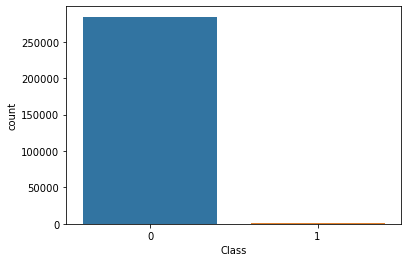

In [31]:
# Gráficamente mostrando el desbalance
sns.countplot(x="Class", data=data)
plt.show()

In [32]:
# Df que contiene la clase 0
data_class_0 = ready_data[ready_data['Class']==0]

In [33]:
# Dimensión del dataset de clase 0
data_class_0.shape

(284315, 11)

In [34]:
# Df que contiene la clase 1
data_class_1 = ready_data[ready_data['Class']==1]

In [35]:
# Dimensión del dataset de clase 1
data_class_1.shape

(492, 11)

In [36]:
# Mostrando el dataset de la clase 0
data_class_0.head()

,0,1,2,3,4,5,6,7,8,9,Class
0,0.467086,-2.514264,0.680702,0.557031,0.886159,-0.390670,-0.307698,0.557548,-0.867594,-0.542188,0
1,-0.418486,-2.107611,-0.128977,0.502337,-0.396307,0.563564,0.433359,-0.896725,0.501146,0.473858,0
2,1.908116,-2.557951,1.961779,0.655338,-0.698543,-0.662131,0.597104,-1.624214,-1.378024,-3.052956,0
3,0.316457,-1.772803,1.545448,0.551811,-1.403620,-2.012082,0.096556,-0.556703,-0.578858,-0.792580,0
4,0.007381,-1.514989,-1.398125,0.938197,0.502000,-0.518773,0.326192,0.177108,-1.232140,0.054105,0


In [37]:
# Motrando el dataset de la clase 1
data_class_1.head()

,0,1,2,3,4,5,6,7,8,9,Class
541,-0.519567,-2.508555,2.198123,-0.001858,2.367292,-1.431358,5.108406,-1.033753,2.121784,0.783610,1
623,2.599639,-1.881339,-0.514992,0.188516,1.413284,-2.390977,-1.047482,-0.619123,-2.478342,-1.338321,1
4920,0.876778,-2.706077,0.072599,0.108673,0.051955,0.221220,5.725148,-1.224765,1.880414,0.645711,1
6108,-0.127540,-3.146523,1.187415,1.955207,2.678625,-0.864675,15.170156,-3.331751,2.483913,0.952021,1
6329,-0.513325,-1.880389,1.019431,-6.332316,2.264611,-1.263248,-0.813482,-3.358304,-1.336191,1.688282,1


In [38]:
# Debido a que que se nota que el dataset está desbalanceado, 
# me preocuparé de balancearlo

#Columnas independientes
X_0 = data_class_0.iloc[:,0:-1]

#Columna dependiente u objetivo
y_0 = data_class_0.iloc[:,-1] 

#Columnas independientes
X_1 = data_class_1.iloc[:,0:-1]

#Columna dependiente u objetivo
y_1 = data_class_1.iloc[:,-1]

# Haciendo un split de los datos dejando un 20% para testeo y un 80% para entraniento del modelo
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.20, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.20, random_state=42)

In [39]:
# Concateno los conjuntos de entramiento y testeo, tanto para las variables
# dependientes como independientes
X_train = pd.concat([X_train_0, X_train_1])
y_train = pd.concat([y_train_0, y_train_1])
X_test = pd.concat([X_test_0 , X_test_1])
y_test = pd.concat([y_test_0 , y_test_1])

In [40]:
# Reviso que la dimensión sea la correcta
X_train.shape

(227845, 10)

In [41]:
# Reviso que la dimensión sea la correcta
y_train.shape

(227845,)

In [42]:
# Reviso que la dimensión sea la correcta
X_test.shape

(56962, 10)

In [43]:
# Reviso que la dimensión sea la correcta
y_test.shape

(56962,)

## SMOTE

Se aplica SMOTE como método de balanceo

In [44]:
print('Dimensión original de dataset %s' % Counter(y_train))

Dimensión original de dataset Counter({0: 227452, 1: 393})


In [45]:
# Aplicando SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Dimensión luego de aplicado el SMOTE %s' % Counter(y_res))

Dimensión luego de aplicado el SMOTE Counter({0: 227452, 1: 227452})


# Regresión Logística

## Solver lbfgs

In [46]:
#Se llama a la función de sklear con el solver lbgfs
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=150)

In [47]:
# Se hace el fit creando el modelo
logit_model = logisticRegr.fit(X_train, y_train)

In [48]:
# Se crea el objeto para guardar los resultados pronosticados
# para el 20% seleccionado para testeo
logit_predict = logisticRegr.predict(X_test)

In [49]:
# Matriz de confusión
# Noto que son pocos los errores que comete FN=52 y FP=5
confusion_matrix(y_test, logit_predict)

array([[56856,     7],
       [   53,    46]])

In [50]:
# Calculo el accuracy
accuracy_score(y_test, logit_predict)

0.9989466661985184

In [51]:
# Imprimo el reporte de clasificación para tener más información
# Noto que el recall y f1 de la clase 1 es bastante bajo y esto se debe
# principalmente a la falta de información de este tipo de casos. 
# Por lo tanto el modelo es muy exacto detectando 0 y no así detectando 1
# por lo que la medida accuracy no es tan recomendable para este tipo de 
# ejercicios y si lo podría ser el f1 que reune una mayor cantidad de información
print(classification_report(y_test, logit_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.87      0.46      0.61        99

    accuracy                           1.00     56962
   macro avg       0.93      0.73      0.80     56962
weighted avg       1.00      1.00      1.00     56962



## Solver newton-cg

In [52]:
#Se llama a la función de sklear con el solver lbgfs
logisticRegr2 = LogisticRegression(solver='newton-cg', max_iter=1000)

In [53]:
# Se hace el fit creando el modelo
logit_model = logisticRegr2.fit(X_train, y_train)

In [54]:
# Se crea el objeto para guardar los resultados pronosticados
# para el 20% seleccionado para testeo
logit_predict2 = logisticRegr2.predict(X_test)

In [55]:
# Matriz de confusión
# Noto que son pocos los errores que comete FN=52 y FP=5
confusion_matrix(y_test, logit_predict2)

array([[56856,     7],
       [   53,    46]])

In [56]:
# Calculo el accuracy
accuracy_score(y_test, logit_predict2)

0.9989466661985184

In [57]:
# Imprimo el reporte de clasificación para tener más información
# Noto que el recall y f1 de la clase 1 es bastante bajo y esto se debe
# principalmente a la falta de información de este tipo de casos. 
# Por lo tanto el modelo es muy exacto detectando 0 y no así detectando 1
# por lo que la medida accuracy no es tan recomendable para este tipo de 
# ejercicios y si lo podría ser el f1 que reune una mayor cantidad de información
print(classification_report(y_test, logit_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.87      0.46      0.61        99

    accuracy                           1.00     56962
   macro avg       0.93      0.73      0.80     56962
weighted avg       1.00      1.00      1.00     56962



## Conclusiones

No hay mayor diferencia en los resultados ocupando distintos solvers y distintas iteraciones, aunque en temas de cálculo es más rápido lbfgs

# Redes neuronales densas - Keras

In [58]:
# Importamos Keras
from tensorflow import keras

In [59]:
# Se inicializa la red neuronal
classifier = keras.Sequential()

2021-10-09 11:16:25.418900: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [60]:
# Agregando la capa input y la primera capa oculta
classifier.add(
    keras.layers.Dense(units =10 , kernel_initializer = 'uniform', activation = 'relu', input_dim =10))

In [61]:
# Agregando la capa de salida
classifier.add(
    keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [62]:
# Compilando la red neuronal
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
X_train.values

array([[ 4.02679672e-04,  1.60140363e+00,  1.24926498e+00, ...,
         5.47007910e-01, -1.03833474e+00,  4.35865721e-01],
       [-4.65510039e-01, -1.05855674e+00,  3.27924850e-01, ...,
        -3.97749753e-01,  2.74285649e-01,  2.05949609e-01],
       [-3.05744683e-01, -1.01992246e+00,  4.45445239e-01, ...,
        -4.92085690e-01,  6.00024923e-01,  1.65814085e-02],
       ...,
       [-2.28817718e-01, -1.34195567e+00,  2.72241144e+00, ...,
        -5.53906628e+00,  5.39326070e+00,  6.75301660e-01],
       [-3.44592831e-01,  1.27799486e+00,  1.79193298e+00, ...,
        -1.93879361e+00,  1.47808731e+00,  2.09470848e+00],
       [-8.76639140e-02, -1.13493721e+00,  5.54949406e-01, ...,
         3.81347361e+00,  5.70507833e+00,  5.44563019e-01]])

In [64]:
# Reusmen del clasificador
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Haciendo fit a la red neuronal al conjunto de entraniento
model = classifier.fit(X_train.values, y_train.values, batch_size = 128, epochs = 5)

2021-10-09 11:16:25.617154: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/5


2021-10-09 11:16:25.636910: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2894350000 Hz


1781/1781 [==============================] - 2s 949us/step - loss: 0.2319 - accuracy: 0.9982
Epoch 2/5
1781/1781 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 0.9990
Epoch 3/5
1781/1781 [==============================] - 2s 963us/step - loss: 0.0046 - accuracy: 0.9992
Epoch 4/5
1781/1781 [==============================] - 2s 1ms/step - loss: 0.0038 - accuracy: 0.9992
Epoch 5/5
1781/1781 [==============================] - 2s 975us/step - loss: 0.0039 - accuracy: 0.9992


In [66]:
# Prediciendo los resultados en el conjunto de testeo
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
score

1781/1781 [==============================] - 1s 787us/step - loss: 0.0040 - accuracy: 0.9992


[0.003969484940171242, 0.9991748929023743]

In [67]:
# Podemos notar que el f1 score es mejor que el de regresión logística pero muy poco
# Por lo que no creo que se justique tal utilización de recursos si el resultado es similar
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.61      0.72        99

    accuracy                           1.00     56962
   macro avg       0.94      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



No Fraud: ROC AUC=0.500
ROC AUC: ROC AUC=0.953


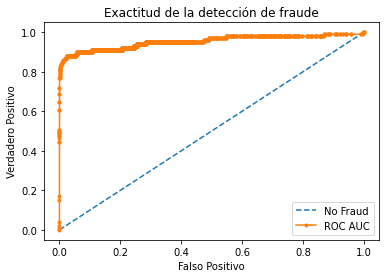

In [68]:
# Genero una predicción de no fraude (clase mayoritaria)
ns_probs = [0 for _ in range(len(y_test))]

# Predicciones
lr_probs = classifier.predict(X_test)

# Mantengo las probabilidades para la salida positiva solamente
lr_probs = lr_probs[:, 0]

# Calculo los score
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Resumen
print('No Fraud: ROC AUC=%.3f' % (ns_auc))
print('ROC AUC: ROC AUC=%.3f' % (lr_auc))

# Curva ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# graficando
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Fraud')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC AUC')
pyplot.xlabel('Falso Positivo')
pyplot.ylabel('Verdadero Positivo')
plt.title('Exactitud de la detección de fraude')
pyplot.legend()
pyplot.show()

## Cambiando el número de capas y neuronas

In [69]:
# Iniciando
classifier2 = keras.Sequential()

In [70]:
# Input y primera capa
classifier2.add(keras.layers.Dense(units = 100 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

In [71]:
# Segunda capa
classifier2.add(keras.layers.Dense(units = 60 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 100))

In [72]:
# Tercera capa
classifier2.add(keras.layers.Dense(units = 40 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 60))

In [73]:
# Cuarta capa
classifier2.add(keras.layers.Dense(units = 25 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 40))

In [74]:
# Quinta capa
classifier2.add(keras.layers.Dense(units = 15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))

In [75]:
# Sexta capa
classifier2.add(keras.layers.Dense(units = 5 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

In [76]:
# Septima capa
classifier2.add(keras.layers.Dense(units = 3 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))

In [77]:
# Octava capa
classifier2.add(keras.layers.Dense(units = 2 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

In [78]:
# Output
classifier2.add(keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [79]:
# Compilando
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [80]:
# Resumen
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_4 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1025      
_________________________________________________________________
dense_6 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                

In [81]:
# Hago fit al conjunto de entrenamiento
model2 = classifier2.fit(X_train.values, y_train.values, batch_size = 128, epochs = 5)

Epoch 1/5
1781/1781 [==============================] - 3s 1ms/step - loss: 0.1827 - accuracy: 0.9984
Epoch 2/5
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0048 - accuracy: 0.9982
Epoch 3/5
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0047 - accuracy: 0.9982
Epoch 4/5
1781/1781 [==============================] - 3s 1ms/step - loss: 0.0040 - accuracy: 0.9982
Epoch 5/5
1781/1781 [==============================] - 3s 1ms/step - loss: 0.0040 - accuracy: 0.9994


In [82]:
# Prediciendo
y_pred2 = classifier2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)
score2 = classifier2.evaluate(X_test, y_test)
score2

1781/1781 [==============================] - 1s 747us/step - loss: 0.0037 - accuracy: 0.9993


[0.003714457619935274, 0.9993153214454651]

In [83]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.82      0.78      0.80        99

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



No Fraud: ROC AUC=0.500
ROC AUC: ROC AUC=0.964


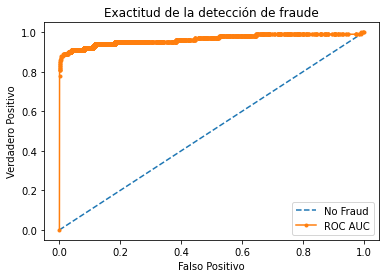

In [84]:
# Genero una predicción de no fraude (clase mayoritaria)
ns_probs = [0 for _ in range(len(y_test))]

# Predicciones
lr_probs = classifier2.predict(X_test)

# Mantengo las probabilidades para la salida positiva solamente
lr_probs = lr_probs[:, 0]

# Calculo los score
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Resumen
print('No Fraud: ROC AUC=%.3f' % (ns_auc))
print('ROC AUC: ROC AUC=%.3f' % (lr_auc))

# Curva ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# graficando
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Fraud')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC AUC')
pyplot.xlabel('Falso Positivo')
pyplot.ylabel('Verdadero Positivo')
plt.title('Exactitud de la detección de fraude')
pyplot.legend()
pyplot.show()

## Conclusiones

Se puede notar que una red neuronal de una capa de entrada obtiene practicamente el mismo resultado que una regresión logística en cuanto a su indicar f1 de 0.63, mientras que una red neuronal de 8 capas y con una entrada de 100 neuronas es capaz de aumentar este f1 a un valor de 0.80. Definitivamente un red densa de varias capas entrega un mejor resultado que una regresión logística, sin embargo, dependiendo de su aplicación, el costo computacional puede ser una variable importante, y en ese caso la red neuronal densa de varias capas es bastante más costosa que una regresión logística. 